In [0]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import RMSprop, SGD, Adadelta, Adam
import matplotlib.pyplot as plt
from google.colab import files

In [0]:
#no of hidden layes
#activation fnc of each layer
# epochs
#overfitting
#regularisation


#Data loaded from mnist dataset available in Keras
num_classes=10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert Each class to binary catogery
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def train_model(layers = 2, hidden_layer_width =512, 
                activation_fn = 'relu', epochs = 20, 
                dropout = False, dropout_factor = 0.2, regularisation = 0.0,
                batch_size = 128, l2_reg = 0.0, optimizer = RMSprop()):

  model = Sequential()
  model.add(Dense(hidden_layer_width, kernel_regularizer = l2(l2_reg),
                  activation = activation_fn, input_shape = (784,)))
  if dropout:
    model.add(Dropout(dropout_factor))
    
  for i in range(1,layers):
    model.add(Dense(hidden_layer_width, kernel_regularizer = l2(l2_reg),
                    activation = activation_fn))
    if dropout:
      model.add(Dropout(dropout_factor))


  model.add(Dense(num_classes, activation = 'softmax'))
  
  model.summary()

  model.compile(loss = 'categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

  history = model.fit(x_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      verbose = 1,
                      validation_split = .1)
  score = model.evaluate(x_test, y_test, verbose=0)
  return history,score  

In [0]:
def print_plot(histories, title, xlabel, ylabel, legend, 
               print_train = False, print_loss = False):
  
  for history in histories:
    if print_train:
      plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
  plt.title(title)
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(legend, loc='best')
  plt.show()
  
  if print_loss:
    for history in histories:
      if print_train:
        plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(legend, loc='best')
    plt.show() 
    
  pass  

In [0]:
# Base Configuration
number_of_hidden_layers = 2
hidden_layer_width = 100
optimizer = RMSprop()
activation_fn = "tanh"
batch_size = 128
epoch = 10

In [0]:
history, score = train_model(layers=number_of_hidden_layers, 
                             hidden_layer_width=hidden_layer_width, 
                             optimizer=optimizer, 
                             activation_fn=activation_fn, 
                             batch_size=batch_size, 
                             epochs=epoch)



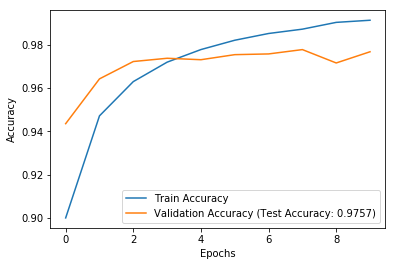

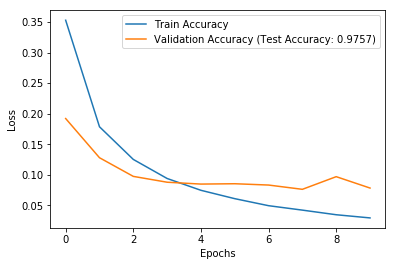

In [0]:
print_plot([history], "", 
          "Epochs", "Accuracy", 
           ["Train Accuracy", 
            "Validation Accuracy (Test Accuracy: {})".format(score[1])],
            True, True)

In [0]:
history, score = train_model(layers=number_of_hidden_layers, 
                             hidden_layer_width=hidden_layer_width, 
                             optimizer=optimizer, 
                             activation_fn=activation_fn, 
                             batch_size=batch_size, 
                             epochs=epoch, dropout=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 46us/step - loss: 0.4146 - a

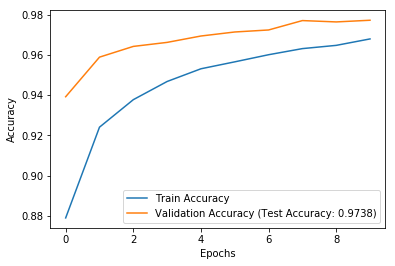

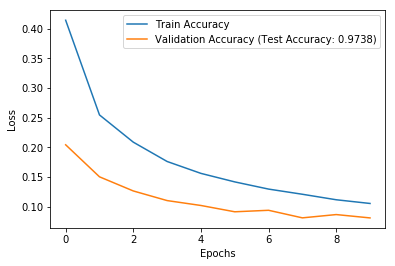

In [0]:
print_plot([history], "", 
          "Epochs", "Accuracy", 
           ["Train Accuracy", 
            "Validation Accuracy (Test Accuracy: {})".format(score[1])],
            True, True)

In [0]:
history, score = train_model(layers=number_of_hidden_layers, 
                             hidden_layer_width=hidden_layer_width, 
                             optimizer=optimizer, 
                             activation_fn=activation_fn, 
                             batch_size=batch_size, 
                             epochs=epoch, l2_reg=0.001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_68 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 46us/step - loss: 0.5482 - acc: 0.8970 - val_loss: 0.3574 - val_acc: 0.9388
Epoch 2/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.3433 - acc: 0.9379 - val_loss: 0.2785 - val_acc: 0.9513
Epoch 3/10
54000/54000 [==============================] - 2s 28us/step - loss: 

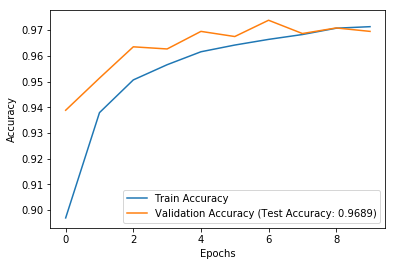

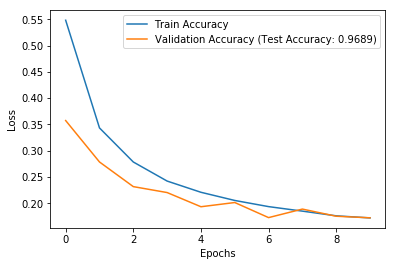

In [0]:
print_plot([history], "", 
          "Epochs", "Accuracy", 
           ["Train Accuracy", 
            "Validation Accuracy (Test Accuracy: {})".format(score[1])],
            True, True)

In [0]:
#Layers
history=[]
label=[]
for i in range(2,6):
  [h,s] = train_model(layers=i, 
                      hidden_layer_width=hidden_layer_width, 
                      optimizer=optimizer, 
                      activation_fn=activation_fn, 
                      batch_size=batch_size, 
                      epochs=epoch)
  history.append(h)   
  
  label.append("No of Hidden Layers "+str(i)+" (Test Accuracy "+str(s[1])+" )")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_71 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_72 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.3445 - acc: 0.9022 - val_loss: 0.1766 - val_acc: 0.9478
Epoch 2/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1724 - acc: 0.9486 - val_loss: 0.1210 - val_acc: 0.9655
Epoch 3/10
54000/54000 [==============================] - 1s 27us/step - loss: 

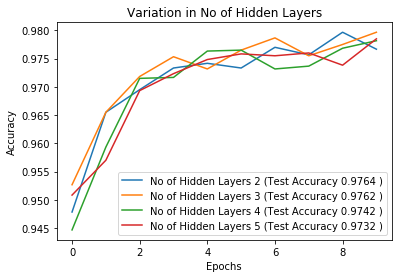

In [0]:
print_plot(history, "Variation in No of Hidden Layers",
           " Epochs", "Accuracy", label)

In [0]:
#Activation Function
history=[]
label=[]
for i in ['relu','sigmoid','tanh']:
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    optimizer=optimizer, 
                    activation_fn=i, 
                    batch_size=batch_size, 
                    epochs=epoch)
  history.append(h)   
  label.append("Activation Function "+i+" (Test Accuracy " + str(s[1]) + " )")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_89 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_90 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.3407 - acc: 0.9030 - val_loss: 0.1401 - val_acc: 0.9638
Epoch 2/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1501 - acc: 0.9549 - val_loss: 0.1017 - val_acc: 0.9692
Epoch 3/10
54000/54000 [==============================] - 1s 26us/step - loss: 

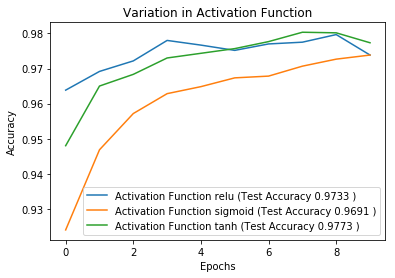

In [0]:
print_plot(history, "Variation in Activation Function", 
           "Epochs", "Accuracy", label)

In [0]:
#Variation in Epochs
history=[]
label=[]
for i in range(10,41,10):
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    optimizer=optimizer, 
                    activation_fn=activation_fn, 
                    batch_size=batch_size, 
                    epochs=i)
  history.append(h)   
  label.append("Epochs "+str(i)+" (Test Accuracy "+str(s[1])+" )")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_98 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_99 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 51us/step - loss: 0.3517 - acc: 0.9004 - val_loss: 0.1792 - val_acc: 0.9498
Epoch 2/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1782 - acc: 0.9465 - val_loss: 0.1191 - val_acc: 0.9667
Epoch 3/10
54000/54000 [==============================] - 1s 27us/step - loss: 

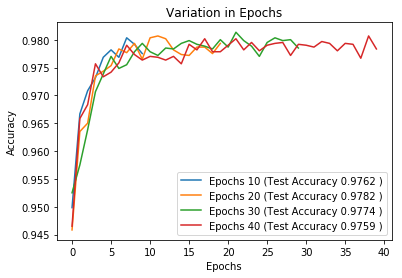

In [0]:
print_plot(history, "Variation in Epochs", 
           "Epochs", "Accuracy", label)

In [0]:
#Variation in Batch Size
history=[]
label=[]
i=128
while i < 1025:
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    optimizer=optimizer, 
                    activation_fn=activation_fn, 
                    batch_size=i, 
                    epochs=epoch)
  history.append(h)   
  label.append("Batch_size "+str(i)+" (Test Accuracy "+str(s[1])+" )")
  i *= 2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_110 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_111 (Dense)            (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.3549 - acc: 0.8981 - val_loss: 0.1753 - val_acc: 0.9498
Epoch 2/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.1758 - acc: 0.9482 - val_loss: 0.1193 - val_acc: 0.9662
Epoch 3/10
54000/54000 [==============================] - 1s 27us/step - loss: 

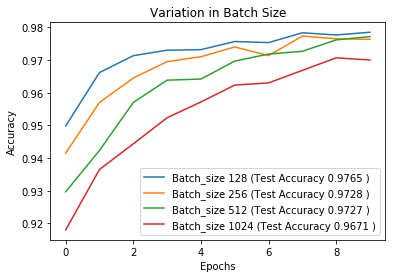

In [0]:
print_plot(history,"Variation in Batch Size"," epochs","acc",label)